In [45]:
import numpy as np

In [46]:
# 数据集
data = np.array([
    [152, 451.15],
    [142, 425.88],
    [64, 191.17],
    [156, 473.64],
    [121, 369.33],
    [70, 215.18],
    [152, 474.62],
    [171, 532.39],
    [124, 351.61],
    [137, 421.03]
])

# 特征和标签
features = data[:, 0]  # 房间数量
target = data[:, 1]  # 房价

In [47]:
def compute_cost(x, y, w, b):
    predictions = w * x + b
    errors = predictions - y
    cost_result = np.mean(errors ** 2) / 2
    return cost_result

In [48]:
# 初始化参数
weight = 0.0
bias = 0.0

# 计算成本
cost = compute_cost(features, target, weight, bias)
print(f"Initial cost: {cost:.2f}")

Initial cost: 81904.86


In [49]:
def gradient_descent(x, y, w, b, lr, ni):
    m = len(x)
    for iteration in range(ni):
        # 计算预测值
        predictions = w * x + b

        # 计算误差
        errors = predictions - y

        # 计算梯度
        dw = np.dot(errors, x) / m
        db = np.sum(errors) / m

        # 更新参数
        w -= lr * dw
        b -= lr * db

        # 输出调试信息
        if iteration % 100 == 0:
            c = compute_cost(x, y, w, b)
            print(f"Iteration {iteration}: Cost {c:.2f}, w {w:.2f}, b {b:.2f}")

    return w, b

# 超参数
learning_rate = 0.0001
num_iterations = 1000

# 执行梯度下降
weight, bias = gradient_descent(features, target, weight, bias, learning_rate, num_iterations)
print(f"Optimized w: {weight:.2f}")
print(f"Optimized b: {bias:.2f}")

# 计算优化后的成本
optimized_cost = compute_cost(features, target, weight, bias)
print(f"Optimized cost: {optimized_cost:.2f}")

Iteration 0: Cost 49522.38, w 5.39, b 0.04
Iteration 100: Cost 57.32, w 3.03, b 0.02
Iteration 200: Cost 57.32, w 3.03, b 0.01
Iteration 300: Cost 57.31, w 3.03, b 0.00
Iteration 400: Cost 57.31, w 3.03, b -0.00
Iteration 500: Cost 57.31, w 3.03, b -0.01
Iteration 600: Cost 57.30, w 3.03, b -0.01
Iteration 700: Cost 57.30, w 3.03, b -0.02
Iteration 800: Cost 57.29, w 3.04, b -0.03
Iteration 900: Cost 57.29, w 3.04, b -0.03
Optimized w: 3.04
Optimized b: -0.04
Optimized cost: 57.29


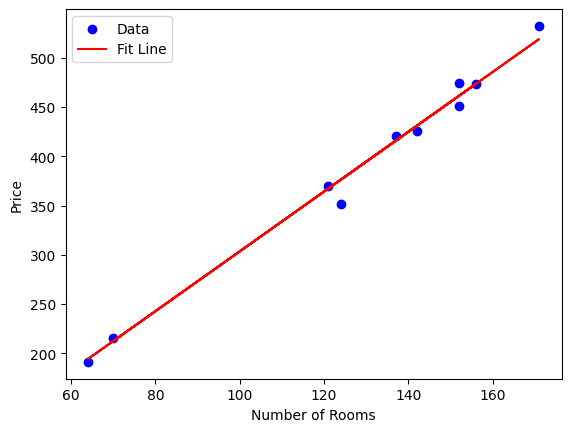

In [50]:
import matplotlib.pyplot as plt

# 绘制数据点
plt.scatter(features, target, color='blue', label='Data')

# 绘制拟合线
plt.plot(features, weight * features + bias, color='red', label='Fit Line')

plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.legend()
plt.show()